# Interfacial Tension Exploration

I explore some behaviors of the interfacial tension of 1k3f at 22 C according to DFT predictions. This exploration will hopefully give me insights as to why the interfacial tension behaves as it does in `20200520_eps_pless_tolman.ipynb`.

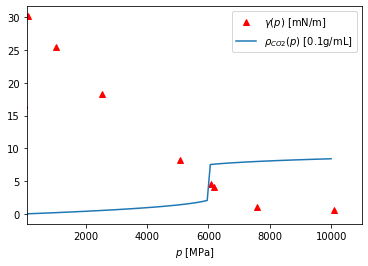

In [1]:
import bubble
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

polyol_data_file = 'input/1k3f_22c.csv' # from DFT and PC-SAFT estimates
eos_co2_file = 'input/eos_co2_22-0C.csv'
Nm_2_mNm = 1E3
kPa_2_MPa = 1E-3
Pa_2_kPa = 1E-3


R = 0.001

p = np.linspace(0, 100E5, 100)
if_interp_arrs = bubble.calc_if_tension_prep(polyol_data_file)
gamma = bubble.calc_if_tension(p, if_interp_arrs, R)
plt.plot(kPa_2_MPa*np.array(if_interp_arrs[0]), np.array(if_interp_arrs[1])*Nm_2_mNm, 'r^', label=r'$\gamma(p)$ [mN/m]')
plt.xlabel(r'$p$ [MPa]')

f = bubble.interp_rho_co2(eos_co2_file)
rho_co2 = f(p)
plt.plot(kPa_2_MPa*np.array(p), rho_co2*1E-2, label=r'$\rho_{CO2}(p)$ [0.1g/mL]')
plt.xlim([np.min(p)*kPa_2_MPa+80, np.max(p)*kPa_2_MPa*1.1])
plt.legend()


Plot interfacial tension as a function of the density of the CO2-rich phase.

Text(0, 0.5, '$\\gamma$ [mN/m]')

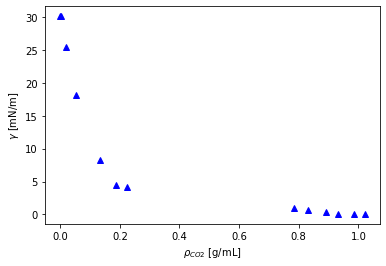

In [2]:
# extracts density of CO2 in CO2-rich phase
df = pd.read_csv(polyol_data_file)
p_dft = df['p actual [kPa]'].to_numpy(dtype=float)
if_tension_arr = df['if tension [mN/m]'].to_numpy(dtype=float) # measured interfacial tension [N/m]
rho_co2 = df['co2 density [g/mL]'].to_numpy(dtype=float)
rho_co2_interp = np.interp(p, p_dft/Pa_2_kPa, rho_co2)
plt.plot(rho_co2, if_tension_arr, 'b^')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\rho_{CO2}$ [g/mL]')
plt.ylabel(r'$\gamma$ [mN/m]')